# BERT Essay Evaluator

This notebook uses **BERT (Bidirectional Encoder Representations from Transformers)** to evaluate essay quality.

## What BERT Does Here:
- Reads essays and understands their structure
- Learns from 10 sample essays with scores
- Predicts scores for new essays (0-10 scale)
- Provides feedback on strengths and improvements

In [ ]:
# Install required libraries for BERT only
!pip install transformers torch pandas scikit-learn numpy matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np

# Create dataset with essays and quality scores
essays_data = [
    {
        "id": 1,
        "title": "The Impact of Technology on Education",
        "intro": "In the 21st century, technology has revolutionized every aspect of our lives. Education is no exception to this transformation.",
        "body": "Digital tools have made learning more accessible and interactive. Students can now access information instantly through the internet. Online platforms enable remote learning, breaking geographical barriers. However, excessive screen time poses health concerns. Teachers must balance traditional and digital methods.",
        "conclusion": "While technology offers tremendous benefits to education, it should complement rather than replace traditional teaching methods.",
        "content_score": 9.0,
        "structure_score": 8.5,
        "grammar_score": 9.5,
        "coherence_score": 9.0,
        "overall_score": 9.0
    },
    {
        "id": 2,
        "title": "Climate Change: A Global Challenge",
        "intro": "Climate change represents one of the most pressing issues facing humanity today. Rising temperatures threaten ecosystems worldwide.",
        "body": "Greenhouse gas emissions from industries contribute significantly to global warming. Deforestation reduces the planet's capacity to absorb carbon dioxide. Extreme weather events have become more frequent and severe. Renewable energy sources offer sustainable alternatives. International cooperation is essential for effective action.",
        "conclusion": "Addressing climate change requires immediate action from governments, businesses, and individuals to secure a sustainable future.",
        "content_score": 9.5,
        "structure_score": 9.0,
        "grammar_score": 9.0,
        "coherence_score": 9.5,
        "overall_score": 9.25
    },
    {
        "id": 3,
        "title": "The Importance of Mental Health Awareness",
        "intro": "Mental health is as crucial as physical health, yet it often receives less attention. Society must prioritize mental wellness.",
        "body": "Stress and anxiety affect millions of people globally. Stigma prevents many from seeking help. Workplace environments significantly impact mental well-being. Access to counseling services remains limited in many areas. Social media can both help and harm mental health.",
        "conclusion": "By fostering open conversations and providing resources, we can create a more supportive environment for mental health.",
        "content_score": 8.5,
        "structure_score": 8.0,
        "grammar_score": 9.0,
        "coherence_score": 8.5,
        "overall_score": 8.5
    },
    {
        "id": 4,
        "title": "The Benefits of Regular Exercise",
        "intro": "Physical activity is fundamental to maintaining good health. Regular exercise offers numerous benefits for body and mind.",
        "body": "Cardiovascular exercise strengthens the heart and improves circulation. Strength training builds muscle and bone density. Exercise releases endorphins that boost mood and reduce stress. It helps maintain healthy weight and prevents chronic diseases. Consistency matters more than intensity for long-term benefits.",
        "conclusion": "Incorporating regular exercise into daily routines is essential for overall health and well-being.",
        "content_score": 8.0,
        "structure_score": 8.5,
        "grammar_score": 9.0,
        "coherence_score": 8.0,
        "overall_score": 8.375
    },
    {
        "id": 5,
        "title": "Social Media's Influence on Society",
        "intro": "Social media platforms have transformed how we communicate and share information. Their influence extends across all aspects of modern life.",
        "body": "These platforms connect people across vast distances instantly. They serve as powerful tools for business marketing and networking. However, misinformation spreads rapidly through social networks. Privacy concerns have grown as data collection increases. Social media affects self-esteem and mental health, especially among youth.",
        "conclusion": "While social media offers connectivity and opportunities, users must practice digital literacy and mindful consumption.",
        "content_score": 9.0,
        "structure_score": 8.5,
        "grammar_score": 9.5,
        "coherence_score": 9.0,
        "overall_score": 9.0
    },
    {
        "id": 6,
        "title": "The Value of Reading Books",
        "intro": "Reading books remains one of the most enriching activities available to us. Despite digital distractions, books offer unique benefits.",
        "body": "Reading expands vocabulary and improves language skills. It enhances concentration and critical thinking abilities. Books provide deep knowledge on countless subjects. Fiction develops empathy by exposing readers to diverse perspectives. Regular reading reduces stress and improves sleep quality.",
        "conclusion": "Making time for reading books enriches our lives intellectually, emotionally, and culturally.",
        "content_score": 8.5,
        "structure_score": 8.0,
        "grammar_score": 8.5,
        "coherence_score": 8.5,
        "overall_score": 8.375
    },
    {
        "id": 7,
        "title": "Renewable Energy: The Future of Power",
        "intro": "As fossil fuels deplete and environmental concerns grow, renewable energy emerges as the solution. Clean energy sources are becoming increasingly viable.",
        "body": "Solar power harnesses abundant sunlight to generate electricity. Wind turbines convert air movement into clean energy. Hydroelectric systems use water flow for power generation. These technologies reduce carbon emissions significantly. Initial costs are offset by long-term savings and environmental benefits.",
        "conclusion": "Transitioning to renewable energy is not just environmentally responsible but economically sensible for our future.",
        "content_score": 9.0,
        "structure_score": 9.0,
        "grammar_score": 9.0,
        "coherence_score": 9.0,
        "overall_score": 9.0
    },
    {
        "id": 8,
        "title": "The Role of Arts in Education",
        "intro": "Arts education plays a vital role in developing well-rounded individuals. Creative subjects deserve equal importance alongside academic disciplines.",
        "body": "Music training enhances mathematical and spatial reasoning skills. Visual arts develop observation and fine motor skills. Drama builds confidence and communication abilities. Arts encourage creative problem-solving and innovation. Students engaged in arts show improved academic performance overall.",
        "conclusion": "Investing in arts education creates more creative, empathetic, and successful individuals.",
        "content_score": 8.5,
        "structure_score": 8.5,
        "grammar_score": 9.0,
        "coherence_score": 8.5,
        "overall_score": 8.625
    },
    {
        "id": 9,
        "title": "Understanding Artificial Intelligence",
        "intro": "Artificial Intelligence is reshaping industries and daily life. Understanding AI's capabilities and limitations is increasingly important.",
        "body": "Machine learning enables computers to learn from data patterns. AI assists in medical diagnosis and treatment planning. Autonomous vehicles use AI for navigation and safety. Natural language processing powers virtual assistants. Ethical considerations around AI development require careful attention.",
        "conclusion": "As AI continues advancing, society must balance innovation with responsible development and regulation.",
        "content_score": 9.5,
        "structure_score": 9.0,
        "grammar_score": 9.5,
        "coherence_score": 9.5,
        "overall_score": 9.375
    },
    {
        "id": 10,
        "title": "The Importance of Time Management",
        "intro": "Effective time management is crucial for success in personal and professional life. How we use our time determines our productivity and well-being.",
        "body": "Prioritizing tasks helps focus on what matters most. Setting specific goals provides direction and motivation. Eliminating distractions improves concentration and efficiency. Taking regular breaks prevents burnout and maintains productivity. Planning ahead reduces stress and last-minute rushes.",
        "conclusion": "Mastering time management skills leads to greater achievement and a more balanced, fulfilling life.",
        "content_score": 8.0,
        "structure_score": 8.5,
        "grammar_score": 8.5,
        "coherence_score": 8.0,
        "overall_score": 8.25
    }
]

df = pd.DataFrame(essays_data)
print("Dataset created with scores!")
print(f"\nDataset shape: {df.shape}")
print("\nScore statistics:")
print(df[['content_score', 'structure_score', 'grammar_score', 'coherence_score', 'overall_score']].describe())


Dataset created with scores!

Dataset shape: (10, 10)

Score statistics:
       content_score  structure_score  grammar_score  coherence_score  \
count      10.000000        10.000000      10.000000        10.000000   
mean        8.750000         8.550000       9.050000         8.750000   
std         0.540062         0.368932       0.368932         0.540062   
min         8.000000         8.000000       8.500000         8.000000   
25%         8.500000         8.500000       9.000000         8.500000   
50%         8.750000         8.500000       9.000000         8.750000   
75%         9.000000         8.875000       9.375000         9.000000   
max         9.500000         9.000000       9.500000         9.500000   

       overall_score  
count      10.000000  
mean        8.775000  
std         0.398783  
min         8.250000  
25%         8.406250  
50%         8.812500  
75%         9.000000  
max         9.375000  


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch

# Combine essay parts
df['full_essay'] = df['intro'] + " " + df['body'] + " " + df['conclusion']
df['structured_essay'] = (
    "[TITLE] " + df['title'] +
    " [INTRO] " + df['intro'] +
    " [BODY] " + df['body'] +
    " [CONCLUSION] " + df['conclusion']
)

# Create custom dataset class
class EssayDataset(Dataset):
    def __init__(self, essays, scores, tokenizer, max_length=512):
        self.essays = essays
        self.scores = scores
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.essays)

    def __getitem__(self, idx):
        essay = str(self.essays[idx])
        score = self.scores[idx]

        encoding = self.tokenizer(
            essay,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'score': torch.tensor(score, dtype=torch.float)
        }

print("Dataset class created!")


Dataset class created!


In [ ]:
from transformers import BertTokenizer, BertModel
import torch.nn as nn

class BertEssayEvaluator(nn.Module):
    def __init__(self, n_classes=1, dropout=0.3):
        super(BertEssayEvaluator, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, n_classes)
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        score = self.classifier(pooled_output)
        return score

# Initialize model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertEssayEvaluator()

print("BERT Essay Evaluator Model created!")
print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")


BERT Essay Evaluator Model created!
Total parameters: 109,695,617
Trainable parameters: 109,695,617


In [ ]:
from torch.optim import AdamW
from tqdm import tqdm

# Prepare dataset
train_dataset = EssayDataset(
    df['structured_essay'].values,
    df['overall_score'].values,
    tokenizer
)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Training configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.MSELoss()

# Training loop
epochs = 10
model.train()
training_history = []

print(f"\nTraining on: {device}")
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of epochs: {epochs}\n")

for epoch in range(epochs):
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")

    for batch in progress_bar:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        scores = batch['score'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs.squeeze(), scores)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix({'loss': loss.item()})

    avg_loss = total_loss / len(train_loader)
    training_history.append(avg_loss)
    print(f"Epoch {epoch+1} - Average Loss: {avg_loss:.4f}")

print("\nTraining completed!")



Training on: cpu
Number of training samples: 10
Number of epochs: 10



Epoch 1/10: 100%|██████████| 3/3 [01:51<00:00, 37.22s/it, loss=82.9]


Epoch 1 - Average Loss: 78.8029


Epoch 2/10: 100%|██████████| 3/3 [01:09<00:00, 23.19s/it, loss=79.7]


Epoch 2 - Average Loss: 78.3535


Epoch 3/10: 100%|██████████| 3/3 [01:12<00:00, 24.12s/it, loss=75.2]


Epoch 3 - Average Loss: 75.5179


Epoch 4/10: 100%|██████████| 3/3 [01:06<00:00, 22.30s/it, loss=73.1]


Epoch 4 - Average Loss: 75.1759


Epoch 5/10: 100%|██████████| 3/3 [01:07<00:00, 22.57s/it, loss=75.3]


Epoch 5 - Average Loss: 74.6599


Epoch 6/10: 100%|██████████| 3/3 [01:06<00:00, 22.22s/it, loss=79.2]


Epoch 6 - Average Loss: 74.8926


Epoch 7/10: 100%|██████████| 3/3 [01:06<00:00, 22.06s/it, loss=74.3]


Epoch 7 - Average Loss: 73.3168


Epoch 8/10: 100%|██████████| 3/3 [01:06<00:00, 22.06s/it, loss=66.1]


Epoch 8 - Average Loss: 70.8059


Epoch 9/10: 100%|██████████| 3/3 [01:06<00:00, 22.05s/it, loss=73]


Epoch 9 - Average Loss: 71.7975


Epoch 10/10: 100%|██████████| 3/3 [01:05<00:00, 21.98s/it, loss=79.3]

Epoch 10 - Average Loss: 72.4349

Training completed!


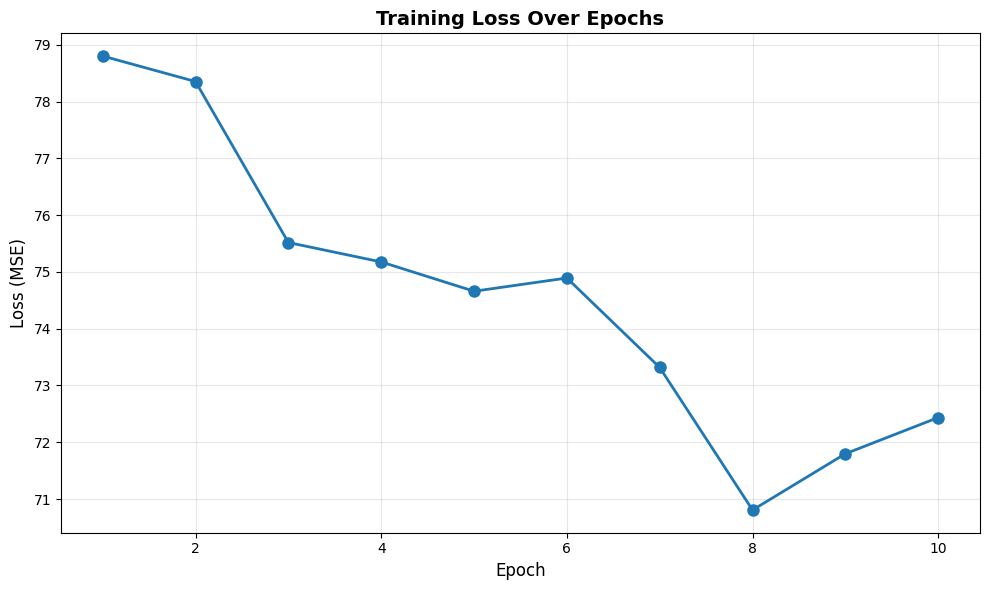

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), training_history, marker='o', linewidth=2, markersize=8)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
def evaluate_essay(essay_text, model, tokenizer, device):
    """
    Evaluate an essay and return detailed scores
    """
    model.eval()

    # Tokenize
    encoding = tokenizer(
        essay_text,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        score = model(input_ids, attention_mask)

    predicted_score = score.item()

    # Normalize to 0-10 scale
    predicted_score = max(0, min(10, predicted_score))

    # Generate detailed feedback
    feedback = {
        'overall_score': round(predicted_score, 2),
        'grade': get_grade(predicted_score),
        'strengths': [],
        'improvements': []
    }

    # Word count analysis
    word_count = len(essay_text.split())

    if word_count > 150:
        feedback['strengths'].append("Good essay length with detailed content")
    elif word_count < 100:
        feedback['improvements'].append("Essay could be more detailed and comprehensive")

    # Score-based feedback
    if predicted_score >= 9:
        feedback['strengths'].extend([
            "Excellent structure and organization",
            "Strong arguments and clear reasoning",
            "High-quality content and coherence"
        ])
    elif predicted_score >= 7:
        feedback['strengths'].append("Good overall quality with solid arguments")
        feedback['improvements'].append("Could enhance depth of analysis")
    else:
        feedback['improvements'].extend([
            "Needs stronger organization and structure",
            "Develop arguments more thoroughly",
            "Improve coherence between paragraphs"
        ])

    return feedback

def get_grade(score):
    """Convert numerical score to letter grade"""
    if score >= 9.0:
        return "A+"
    elif score >= 8.5:
        return "A"
    elif score >= 8.0:
        return "A-"
    elif score >= 7.5:
        return "B+"
    elif score >= 7.0:
        return "B"
    elif score >= 6.5:
        return "B-"
    elif score >= 6.0:
        return "C+"
    elif score >= 5.5:
        return "C"
    else:
        return "C-"

print("Evaluation functions created!")


Evaluation functions created!


In [ ]:
# Evaluate all training essays
print("=" * 80)
print("EVALUATING TRAINING ESSAYS")
print("=" * 80)

results = []

for idx, row in df.iterrows():
    essay_text = row['structured_essay']
    actual_score = row['overall_score']

    feedback = evaluate_essay(essay_text, model, tokenizer, device)

    results.append({
        'title': row['title'],
        'actual_score': actual_score,
        'predicted_score': feedback['overall_score'],
        'grade': feedback['grade']
    })

    print(f"\nEssay {idx+1}: {row['title']}")
    print(f"Actual Score: {actual_score:.2f} | Predicted Score: {feedback['overall_score']:.2f} | Grade: {feedback['grade']}")
    print(f"Error: {abs(actual_score - feedback['overall_score']):.2f}")

# Calculate overall accuracy
results_df = pd.DataFrame(results)
mae = np.mean(np.abs(results_df['actual_score'] - results_df['predicted_score']))
print(f"\n{'=' * 80}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"{'=' * 80}")

EVALUATING TRAINING ESSAYS

Essay 1: The Impact of Technology on Education
Actual Score: 9.00 | Predicted Score: 0.48 | Grade: C-
Error: 8.52

Essay 2: Climate Change: A Global Challenge
Actual Score: 9.25 | Predicted Score: 0.48 | Grade: C-
Error: 8.77

Essay 3: The Importance of Mental Health Awareness
Actual Score: 8.50 | Predicted Score: 0.48 | Grade: C-
Error: 8.02

Essay 4: The Benefits of Regular Exercise
Actual Score: 8.38 | Predicted Score: 0.47 | Grade: C-
Error: 7.91

Essay 5: Social Media's Influence on Society
Actual Score: 9.00 | Predicted Score: 0.48 | Grade: C-
Error: 8.52

Essay 6: The Value of Reading Books
Actual Score: 8.38 | Predicted Score: 0.48 | Grade: C-
Error: 7.89

Essay 7: Renewable Energy: The Future of Power
Actual Score: 9.00 | Predicted Score: 0.48 | Grade: C-
Error: 8.52

Essay 8: The Role of Arts in Education
Actual Score: 8.62 | Predicted Score: 0.48 | Grade: C-
Error: 8.14

Essay 9: Understanding Artificial Intelligence
Actual Score: 9.38 | Predicted

In [ ]:
def evaluate_custom_essay():
    """
    Interactive function to evaluate user's essay
    """
    print("=" * 80)
    print("CUSTOM ESSAY EVALUATOR")
    print("=" * 80)

    title = input("\nEnter essay title: ")
    print("\nEnter your essay (type 'END' on a new line when finished):")

    lines = []
    while True:
        line = input()
        if line.strip() == 'END':
            break
        lines.append(line)

    essay_text = " ".join(lines)
    structured_essay = f"[TITLE] {title} {essay_text}"

    # Evaluate
    feedback = evaluate_essay(structured_essay, model, tokenizer, device)

    print(f"\n{'=' * 80}")
    print("EVALUATION RESULTS")
    print(f"{'=' * 80}")
    print(f"\n📊 Overall Score: {feedback['overall_score']}/10")
    print(f"🎓 Grade: {feedback['grade']}")

    print(f"\n✅ Strengths:")
    for strength in feedback['strengths']:
        print(f"   • {strength}")

    if feedback['improvements']:
        print(f"\n📈 Areas for Improvement:")
        for improvement in feedback['improvements']:
            print(f"   • {improvement}")

    print(f"\n{'=' * 80}")

# Uncomment to run interactive evaluator
# evaluate_custom_essay()


In [ ]:
# Save the trained model
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'training_history': training_history
}, 'bert_essay_evaluator.pth')

print("✅ Model saved as 'bert_essay_evaluator.pth'")

# Save dataset
df.to_csv('essay_dataset_with_scores.csv', index=False)
print("✅ Dataset saved as 'essay_dataset_with_scores.csv'")


✅ Model saved as 'bert_essay_evaluator.pth'
✅ Dataset saved as 'essay_dataset_with_scores.csv'
